In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cpu-and-gpu-product-data/chip_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("../input/cpu-and-gpu-product-data/chip_dataset.csv")
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [5]:
df.dtypes

Unnamed: 0                 int64
Product                   object
Type                      object
Release Date              object
Process Size (nm)        float64
TDP (W)                  float64
Die Size (mm^2)          float64
Transistors (million)    float64
Freq (MHz)               float64
Foundry                   object
Vendor                    object
FP16 GFLOPS              float64
FP32 GFLOPS              float64
FP64 GFLOPS              float64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [7]:
df["Product"].value_counts()

AMD Athlon 64 3200+         12
AMD Sempron 3000+           10
AMD Athlon 64 3000+         10
Intel HD Graphics           10
AMD Athlon 64 3500+          9
                            ..
AMD Opteron 6276             1
AMD Opteron 6278             1
Intel Xeon E5-1620 v2        1
AMD Phenom X4 9750 (95W)     1
NVIDIA GeForce 9300 SE       1
Name: Product, Length: 4278, dtype: int64

In [8]:
df.Foundry.value_counts()

TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: Foundry, dtype: int64

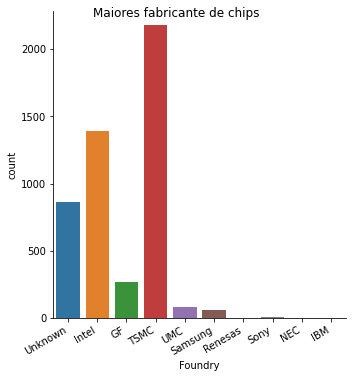

In [9]:
g = sns.catplot(data= df, x="Foundry", kind="count")
g.fig.suptitle("Maiores fabricante de chips")
g.set_xticklabels(rotation=30, ha="right")

In [10]:
df["Type"].value_counts()

GPU    2662
CPU    2192
Name: Type, dtype: int64

In [11]:
fig = px.pie(df, values = df['Type'].value_counts().values, names = df['Type'].value_counts().index)
fig.show()

In [12]:
gpu = df[df["Type"] == "GPU"]
CPU = df[df["Type"] == "CPU"]

In [13]:
fig = px.histogram(CPU, x="Foundry", title= "Maiores fabricantes de CPU", text_auto=True)
fig.show()

In [14]:
fig = px.histogram(gpu, x="Foundry", title= "Maiores fabricantes de GPU", text_auto=True)
fig.show()

In [15]:
df["Ano de lancamento"] = df['Release Date'].str[:4]

In [16]:
df["Ano de lancamento"].value_counts()

2013    349
2012    331
2011    330
2010    291
2008    285
2004    266
2006    264
2005    249
2007    227
2009    221
2017    218
2015    213
2014    208
2018    203
2019    201
2003    185
2020    174
2021    143
2001    135
2016    131
2002    108
NaT      75
2000     47
Name: Ano de lancamento, dtype: int64

In [17]:
new_df = df[df['Ano de lancamento'] != "NaT"]

In [18]:
new_df["Ano de lancamento"] = new_df["Ano de lancamento"].astype(int) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
fig = px.histogram(new_df, x="Ano de lancamento", title="Ano de lançamento", color="Foundry")
fig.show()

In [20]:
ano_2013 = new_df[new_df["Ano de lancamento"] == 2013]

In [21]:
fig = px.histogram(ano_2013, x="Foundry", title= "Empresas que lançaram cpu e gpu em 2013", text_auto=True, color= "Type")
fig.show()

In [22]:
fig = px.box(new_df, y="Ano de lancamento")
fig.show()

In [23]:
fig = px.histogram(new_df, x = "Vendor", color="Type")
fig.show()

In [24]:
fig = px.histogram(new_df, x="Ano de lancamento", title="Ano de lançamento", color="Vendor")
fig.show()

In [25]:
fig = px.histogram(new_df, x="Process Size (nm)")
fig.show()

In [26]:
fig = px.box(new_df, y="Process Size (nm)")
fig.show()

In [27]:
new_df.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Ano de lancamento
count,4779.000000,4773.000000,4162.000000,4069.000000,4078.000000,4779.000000,516.000000,1898.000000,1271.000000,4779.00000
mean,2411.296924,54.939451,80.648006,187.304006,1897.192496,1495.234149,8249.428411,2073.512202,364.951023,2010.79117
std,1401.539540,44.380328,75.681734,124.735615,4001.630369,1068.745552,13871.083332,3809.916302,1160.675489,5.50641
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,4.800000,2000.00000
25%,1195.500000,22.000000,33.000000,104.000000,154.000000,596.000000,768.800000,254.875000,37.580000,2006.00000
50%,2402.000000,40.000000,65.000000,148.000000,585.000000,1090.000000,2914.000000,691.200000,88.560000,2011.00000
75%,3625.500000,90.000000,100.000000,239.000000,1500.000000,2400.000000,10390.000000,2046.000000,210.900000,2015.00000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000,2021.00000


In [28]:
fig = px.histogram(new_df, x="TDP (W)", marginal = 'box')
fig.show()

<AxesSubplot:>

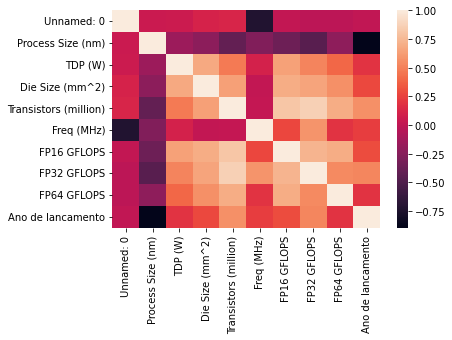

In [29]:
#df.corr()
sns.heatmap(new_df.corr())

In [30]:
fig = px.box(new_df, x="Vendor", y="Process Size (nm)")
fig.show()

In [31]:
fig = px.box(new_df, x="Vendor", y="TDP (W)")
fig.show()

[Text(0.5, 1.0, 'Mediana de TDP da distribuidoras')]

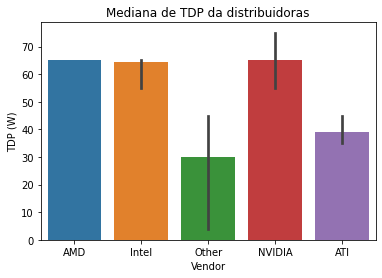

In [32]:
sns.barplot(data=new_df, x="Vendor", y="TDP (W)", estimator=np.median).set(title="Mediana de TDP da distribuidoras")

In [33]:
fig = px.scatter(new_df, y="Process Size (nm)", x="Ano de lancamento", color="Vendor")
fig.show()

In [34]:
fig = px.scatter(new_df, y="TDP (W)", x="Ano de lancamento", color="Vendor")
fig.show()